In [1]:
import pandas as pd

train_churn = pd.read_csv("datasets/df_train.csv")
test_churn = pd.read_csv("datasets/df_test.csv")                  

# Pre-Tratamento

In [43]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   object 
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   object 
 15  Multiple Lines     5986 non-null   object 
 16  Internet Service   5986 

In [3]:
train_churn['Tech Support'].unique()

array(['No', 'No internet service', 'Yes'], dtype=object)

In [4]:
train_churn['Churn Label'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
train_churn['Tenure Months'].unique()

array([ 1, 38, 64, 72, 42, 18, 68, 29, 14, 50,  3, 22, 69, 47, 71, 23, 56,
       19, 10, 67, 66, 17, 26, 40, 44, 15, 24, 65, 34, 60,  7, 20, 27,  6,
       62, 12, 37, 35, 39, 70,  9,  2,  5, 61, 21, 16, 45,  4,  8, 28, 59,
       30, 11, 49, 25, 52, 63, 32, 13, 53, 48, 33, 41, 51, 31, 57, 43, 55,
       58, 54, 46, 36,  0])

## Realize uma análise exploratória dos dados e responda às seguintes questões: existe alguma cidade com taxa de churn significativamente maior? O churn é mais prevalente entre clientes recentes ou antigos? Quais serviços são menos utilizados?

 - Sim, Pegando um top 20 das cidades que mais aparecem podemos verificar a taxa de variacao maior em algumas, como Modesto que chega a quase 50% das pessoas com numero de desistencias pelo que entendi.
 - A desistencia e mais facil em grupos mais novos do que em grupo mais antigos de clientes.
 - Internet e Phone sao os dois menos usados.

In [19]:
train_churn['Churn Label'] = train_churn['Churn Label'].replace('Yes', 1)
train_churn['Churn Label'] = train_churn['Churn Label'].replace('No', 0)

In [20]:
train_churn['City'].value_counts()

City
Los Angeles      270
San Diego        130
San Jose          94
San Francisco     91
Sacramento        90
                ... 
Santa Clarita      1
Crockett           1
Jamestown          1
Squaw Valley       1
Leggett            1
Name: count, Length: 1129, dtype: int64

In [33]:
big_city = train_churn['City'].value_counts().head(20).index
df_big_cities = train_churn[train_churn['City'].isin(big_city)]
rate_churn = df_big_cities.groupby("City")["Churn Label"].mean().sort_values(ascending=False)

In [34]:
rate_churn

City
Modesto          0.480000
Santa Barbara    0.375000
Pasadena         0.347826
Glendale         0.323529
Oakland          0.307692
Stockton         0.305556
Los Angeles      0.300000
San Diego        0.300000
Anaheim          0.291667
Berkeley         0.291667
San Jose         0.276596
San Francisco    0.274725
Burbank          0.260870
Fresno           0.258621
Long Beach       0.250000
Sacramento       0.244444
Riverside        0.233333
Irvine           0.166667
Whittier         0.142857
Bakersfield      0.064516
Name: Churn Label, dtype: float64

In [51]:
intervalo = [0, 6, float('inf')]
labels = ['0-6 meses', 'mais do 6 meses']
train_churn['Tenure Group'] = pd.cut(train_churn['Tenure Months'], bins=intervalo, labels=labels, right=True)
rate_churn_per_group= train_churn.groupby('Tenure Group')['Churn Label'].mean()

/tmp/ipykernel_41188/3929106320.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_churn_per_group= train_churn.groupby('Tenure Group')['Churn Label'].mean()


/tmp/ipykernel_41188/1697791032.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenure Group', y='Churn Label Mean', data=df_rate_churn_group, palette='pastel')


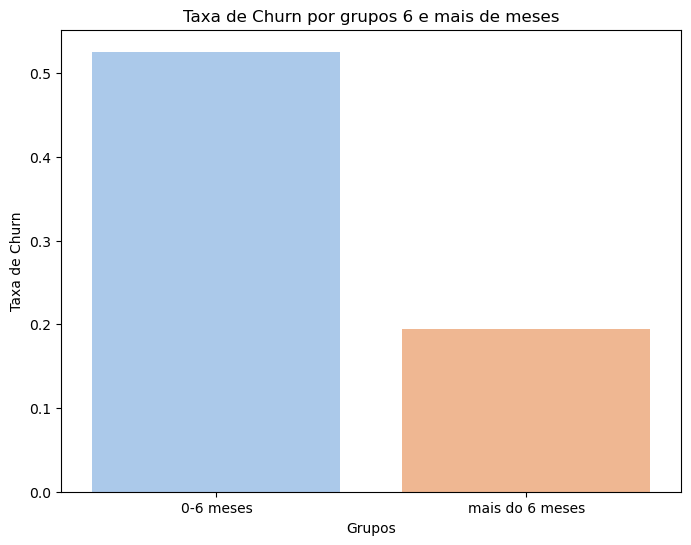

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df_rate_churn_group = rate_churn_per_group.reset_index()
df_rate_churn_group.columns=['Tenure Group', 'Churn Label Mean']

plt.figure(figsize=(8, 6))
sns.barplot(x='Tenure Group', y='Churn Label Mean', data=df_rate_churn_group, palette='pastel')
plt.xlabel('Grupos')
plt.ylabel('Taxa de Churn')
plt.title('Taxa de Churn por grupos 6 e mais de meses')
plt.show()

In [71]:
phone_service_counts = train_churn['Phone Service'].value_counts()
multiple_lines_counts = train_churn['Multiple Lines'].value_counts()
internet_service_counts = train_churn['Internet Service'].value_counts()
online_security_counts = train_churn['Online Security'].value_counts()
online_backup_counts = train_churn['Online Backup'].value_counts()
device_protection_counts = train_churn['Device Protection'].value_counts()
tech_support_counts = train_churn['Tech Support'].value_counts()
streaming_tv_counts = train_churn['Streaming TV'].value_counts()
streaming_movies_counts = train_churn['Streaming Movies'].value_counts()

service_counts = {
    'Phone Service': phone_service_counts,
    'Multiple Lines': multiple_lines_counts,
    'Internet Service': internet_service_counts,
    'Online Security': online_security_counts,
    'Online Backup': online_backup_counts,
    'Device Protection': device_protection_counts,
    'Tech Support': tech_support_counts,
    'Streaming TV': streaming_tv_counts,
    'Streaming Movies': streaming_movies_counts
}

for service, counts in service_counts.items():
    no_counts = counts[counts.index == 'No']
    if not no_counts.empty:
        print(no_counts)

Phone Service
No    585
Name: count, dtype: int64
Multiple Lines
No    2894
Name: count, dtype: int64
Internet Service
No    1318
Name: count, dtype: int64
Online Security
No    2972
Name: count, dtype: int64
Online Backup
No    2624
Name: count, dtype: int64
Device Protection
No    2612
Name: count, dtype: int64
Tech Support
No    2925
Name: count, dtype: int64
Streaming TV
No    2394
Name: count, dtype: int64
Streaming Movies
No    2347
Name: count, dtype: int64


In [ ]:
## Tratamento exploratorio

## Compare os resultados obtidos entre uma árvore de decisão e uma floresta aleatória em termos de precisão na classificação de churn de clientes. Avalie também outras métricas relevantes, como recall e F1-score, para entender melhor a eficácia de cada modelo na previsão de churn.